# 6.1.4 Generate Random Latitudes and Longitudes

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities 

In [4]:
# Import the citipy module 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

625

# 6.2.6 Get the City Weather Data

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#print(url)

### Import our dependencies and initialize counters and an empty list that will hold the weather data.
### Loop Through the List of Cities and Build the City URL (Keep adding to previous cell).
### Handle API Request Errors with try-except Blocks

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | san rafael
Processing Record 5 of Set 1 | boysun
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | kahului
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | liku
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing 

Processing Record 40 of Set 4 | taltal
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | apatou
Processing Record 43 of Set 4 | maiduguri
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | basoko
Processing Record 46 of Set 4 | kieta
Processing Record 47 of Set 4 | tevaitoa
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | agboville
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | itaituba
Processing Record 2 of Set 5 | emba
Processing Record 3 of Set 5 | kamenka
Processing Record 4 of Set 5 | lasa
Processing Record 5 of Set 5 | tigil
Processing Record 6 of Set 5 | gacko
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 5 | morondava
Processing Record 9 of Set 5 | el alto
Processing Record 10 of Set 5 | bathsheba
Processing Record 11 of Set 5 | reinosa
Processing Record 12 of Set 5 | rawson
Processing Record 13 of Set 5 | touros
Processing Record 1

Processing Record 33 of Set 8 | tutoia
Processing Record 34 of Set 8 | mocuba
Processing Record 35 of Set 8 | pringsewu
Processing Record 36 of Set 8 | drayton valley
Processing Record 37 of Set 8 | baykit
Processing Record 38 of Set 8 | filingue
Processing Record 39 of Set 8 | shahrud
Processing Record 40 of Set 8 | markala
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | khvoynaya
Processing Record 43 of Set 8 | taoudenni
Processing Record 44 of Set 8 | biak
Processing Record 45 of Set 8 | am timan
Processing Record 46 of Set 8 | rudnyy
Processing Record 47 of Set 8 | vostochnyy
Processing Record 48 of Set 8 | pascagoula
Processing Record 49 of Set 8 | dukat
Processing Record 50 of Set 8 | mayor pablo lagerenza
Processing Record 1 of Set 9 | yara
Processing Record 2 of Set 9 | chagda
City not found. Skipping...
Processing Record 3 of Set 9 | kenai
Processing Record 4 of Set 9 | mezen
Processing Record 5 of Set 9 | sao joao da barra
Processing Record 6 of S

Processing Record 22 of Set 12 | tungor
Processing Record 23 of Set 12 | tyukhtet
Processing Record 24 of Set 12 | broken hill
Processing Record 25 of Set 12 | mongoumba
Processing Record 26 of Set 12 | nuuk
Processing Record 27 of Set 12 | dalby
Processing Record 28 of Set 12 | gravdal
Processing Record 29 of Set 12 | harper
Processing Record 30 of Set 12 | birao
Processing Record 31 of Set 12 | surt
Processing Record 32 of Set 12 | komsomolskiy
Processing Record 33 of Set 12 | larkollen
Processing Record 34 of Set 12 | salina cruz
Processing Record 35 of Set 12 | bassano
Processing Record 36 of Set 12 | khormuj
City not found. Skipping...
Processing Record 37 of Set 12 | birjand
Processing Record 38 of Set 12 | muros
Processing Record 39 of Set 12 | samana
Processing Record 40 of Set 12 | lucapa
Processing Record 41 of Set 12 | roebourne
Processing Record 42 of Set 12 | lethem
Processing Record 43 of Set 12 | bereda
Processing Record 44 of Set 12 | marzuq
Processing Record 45 of Set 

In [10]:
len(cities)

625

# 6.2.7 Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,53.29,81,100,1.63,US,2021-07-29 17:54:27
1,Albany,42.6001,-73.9662,73.80,83,98,1.01,US,2021-07-29 17:50:43
2,San Rafael,-34.6177,-68.3301,61.09,18,0,13.24,AR,2021-07-29 17:53:39
3,Boysun,38.2061,67.1986,78.93,22,0,8.41,UZ,2021-07-29 17:54:28
4,Butaritari,3.0707,172.7902,82.78,73,9,10.38,KI,2021-07-29 17:54:28
5,Pevek,69.7008,170.3133,32.32,94,100,25.99,RU,2021-07-29 17:54:29
6,Victoria,22.2855,114.1577,86.38,88,100,1.99,HK,2021-07-29 17:53:46
7,Hobart,-42.8794,147.3294,45.05,81,92,3.00,AU,2021-07-29 17:54:29
8,Kahului,20.8947,-156.4700,76.84,91,23,11.99,US,2021-07-29 17:54:30
9,Dikson,73.5069,80.5464,42.66,82,100,13.15,RU,2021-07-29 17:54:30


In [12]:
# Reorder the columns in the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-07-29 17:54:27,57.7900,-152.4072,53.29,81,100,1.63
1,Albany,US,2021-07-29 17:50:43,42.6001,-73.9662,73.80,83,98,1.01
2,San Rafael,AR,2021-07-29 17:53:39,-34.6177,-68.3301,61.09,18,0,13.24
3,Boysun,UZ,2021-07-29 17:54:28,38.2061,67.1986,78.93,22,0,8.41
4,Butaritari,KI,2021-07-29 17:54:28,3.0707,172.7902,82.78,73,9,10.38
5,Pevek,RU,2021-07-29 17:54:29,69.7008,170.3133,32.32,94,100,25.99
6,Victoria,HK,2021-07-29 17:53:46,22.2855,114.1577,86.38,88,100,1.99
7,Hobart,AU,2021-07-29 17:54:29,-42.8794,147.3294,45.05,81,92,3.00
8,Kahului,US,2021-07-29 17:54:30,20.8947,-156.4700,76.84,91,23,11.99
9,Dikson,RU,2021-07-29 17:54:30,73.5069,80.5464,42.66,82,100,13.15


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

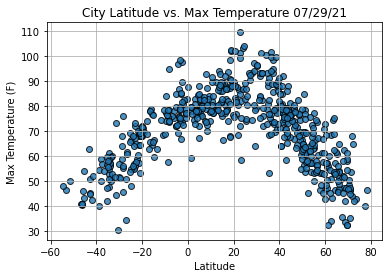

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

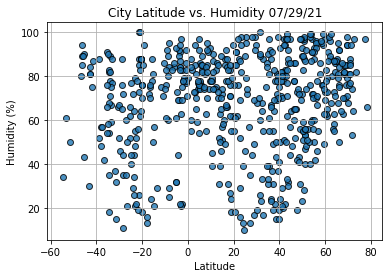

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

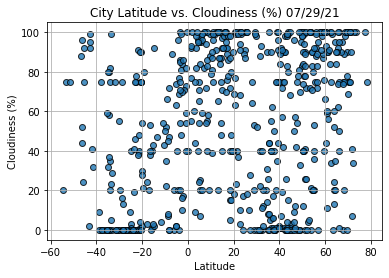

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

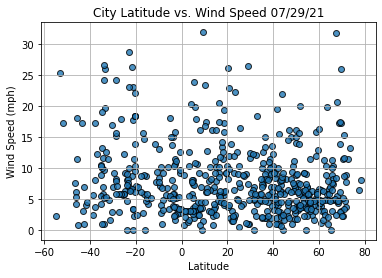

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

### Create a Linear Regression Function

In [66]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line & equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

In [55]:
# Get a specific row from a current DataFrame using .loc: row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-07-29 17:54:32
Lat                        -33.65
Lng                      115.3333
Max Temp                    51.08
Humidity                       67
Cloudiness                     99
Wind Speed                  25.97
Name: 13, dtype: object

In [56]:
# Filter the DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
572    False
573    False
574     True
575     True
576    False
Name: Lat, Length: 577, dtype: bool

In [57]:
# Return a DataFrame with all data fitting the criteria (latitudes > = to 0) using .loc method on city_data_df
# city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-07-29 17:54:27,57.7900,-152.4072,53.29,81,100,1.63
1,Albany,US,2021-07-29 17:50:43,42.6001,-73.9662,73.80,83,98,1.01
3,Boysun,UZ,2021-07-29 17:54:28,38.2061,67.1986,78.93,22,0,8.41
4,Butaritari,KI,2021-07-29 17:54:28,3.0707,172.7902,82.78,73,9,10.38
5,Pevek,RU,2021-07-29 17:54:29,69.7008,170.3133,32.32,94,100,25.99


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

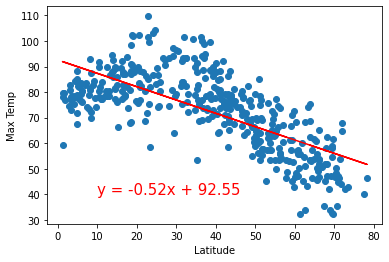

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

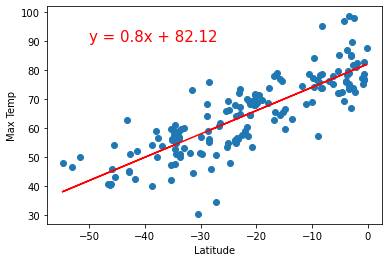

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

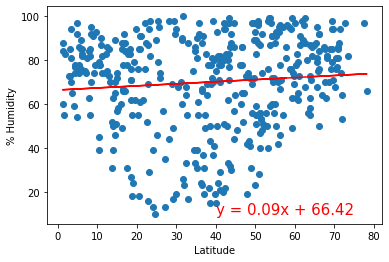

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

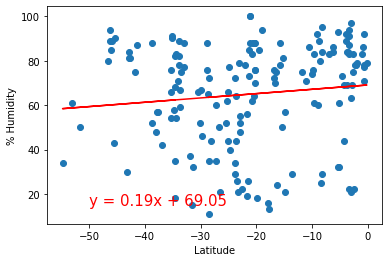

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

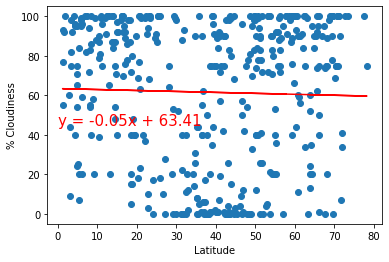

In [101]:
# SKILL DRILL: Refactor the code we have been using to create the x and y values for the percent cloudiness and latitudes
    # on the Northern Hemisphere DataFrame 
    
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,45))

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

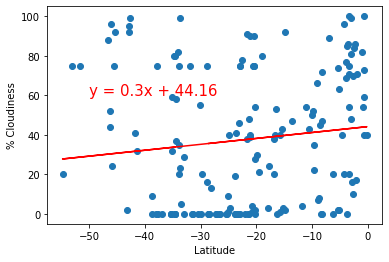

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

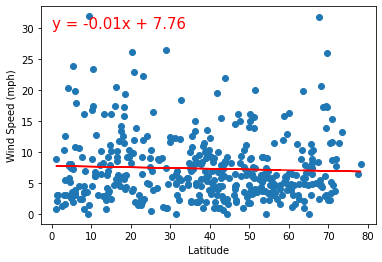

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,30))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

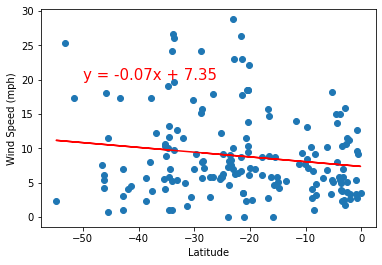

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,20))